Example 1: Uniform prior (a=b=1)
Prior variance: 0.083333
Posterior variance: 0.055556
Posterior/Prior ratio: 0.666667


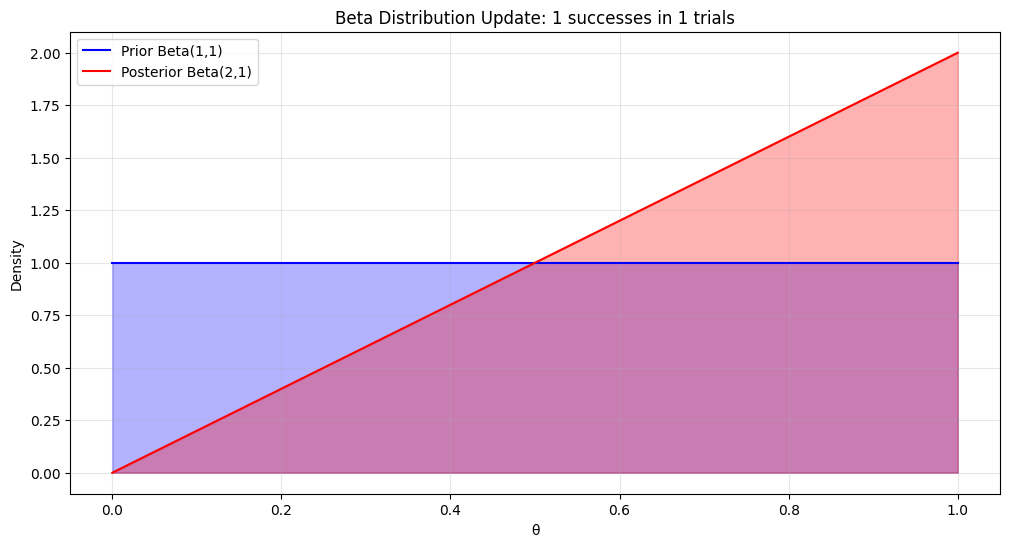


Example 2: Our counterexample (a=0.1, b=2)
Prior variance: 0.014630
Posterior variance: 0.055836
Posterior/Prior ratio: 3.816680


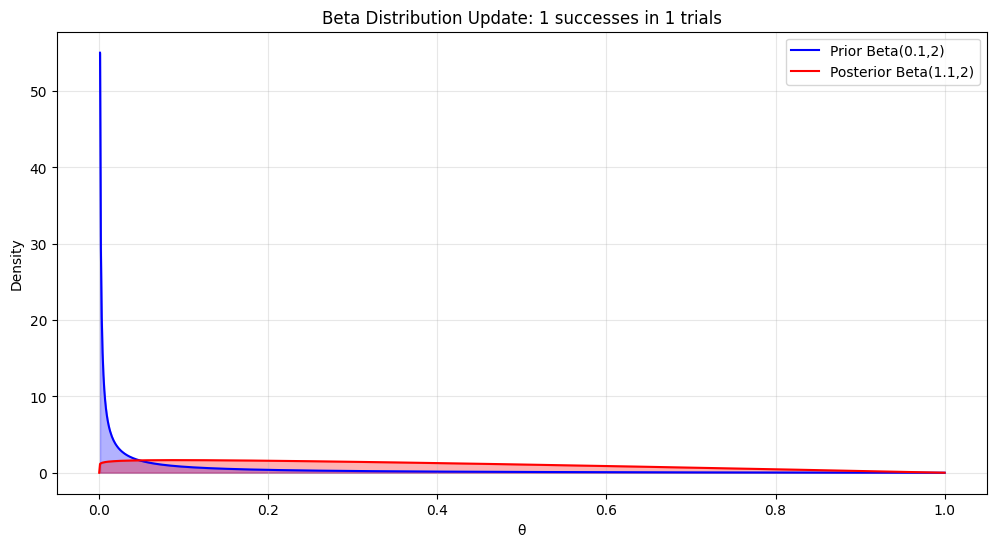


Example 3: Another case (a=0.2, b=3)
Prior variance: 0.013951
Posterior variance: 0.039246
Posterior/Prior ratio: 2.813187


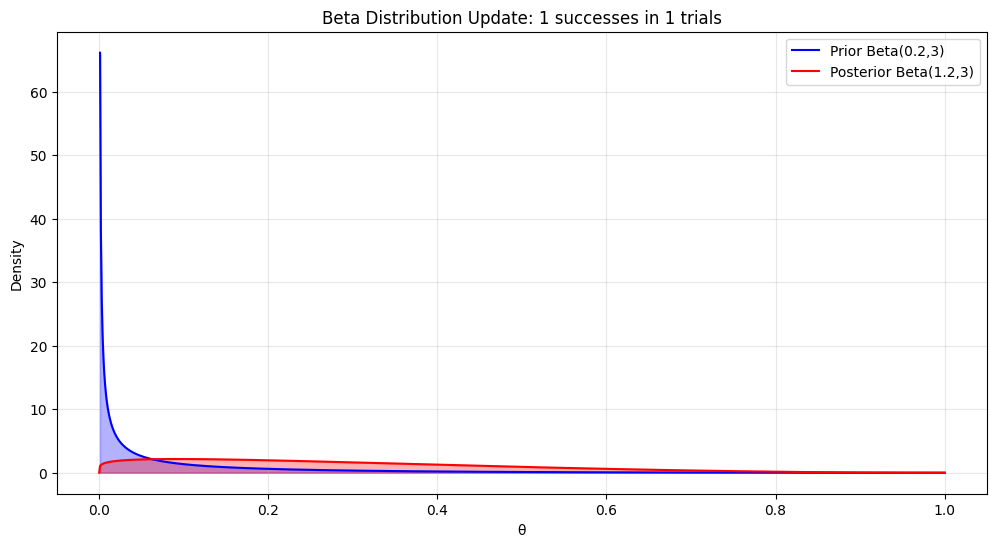

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to calculate Beta distribution variance
def beta_variance(a, b):
    """
    Calculate the variance of a Beta(a,b) distribution
    Formula: (a*b)/((a+b)^2 * (a+b+1))
    """
    return (a * b) / ((a + b)**2 * (a + b + 1))

# Function to plot Beta distributions and print variances
def analyze_beta_update(a, b, x, n):
    """
    Analyze how the Beta distribution changes after observing x successes in n trials
    Parameters:
        a, b: prior Beta parameters
        x: number of successes
        n: number of trials
    """
    # Calculate posterior parameters
    post_a = a + x
    post_b = b + (n - x)
    
    # Calculate variances
    prior_var = beta_variance(a, b)
    post_var = beta_variance(post_a, post_b)
    
    # Create points for plotting
    theta = np.linspace(0, 1, 1000)
    
    # Calculate distributions
    prior = stats.beta(a, b).pdf(theta)
    posterior = stats.beta(post_a, post_b).pdf(theta)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(theta, prior, 'b-', label=f'Prior Beta({a},{b})')
    plt.plot(theta, posterior, 'r-', label=f'Posterior Beta({post_a},{post_b})')
    plt.fill_between(theta, prior, alpha=0.3, color='blue')
    plt.fill_between(theta, posterior, alpha=0.3, color='red')
    
    plt.title(f'Beta Distribution Update: {x} successes in {n} trials')
    plt.xlabel('θ')
    plt.ylabel('Density')
    plt.legend()
    
    # Print variances
    print(f"Prior variance: {prior_var:.6f}")
    print(f"Posterior variance: {post_var:.6f}")
    print(f"Posterior/Prior ratio: {post_var/prior_var:.6f}")
    
    plt.grid(True, alpha=0.3)
    plt.show()

# Let's try different examples:

# Example 1: Uniform prior (a=b=1)
print("Example 1: Uniform prior (a=b=1)")
analyze_beta_update(1, 1, 1, 1)

# Example 2: Our counterexample (a=0.1, b=2)
print("\nExample 2: Our counterexample (a=0.1, b=2)")
analyze_beta_update(0.1, 2, 1, 1)

# Example 3: Another case (a=0.2, b=3)
print("\nExample 3: Another case (a=0.2, b=3)")
analyze_beta_update(0.2, 3, 1, 1)

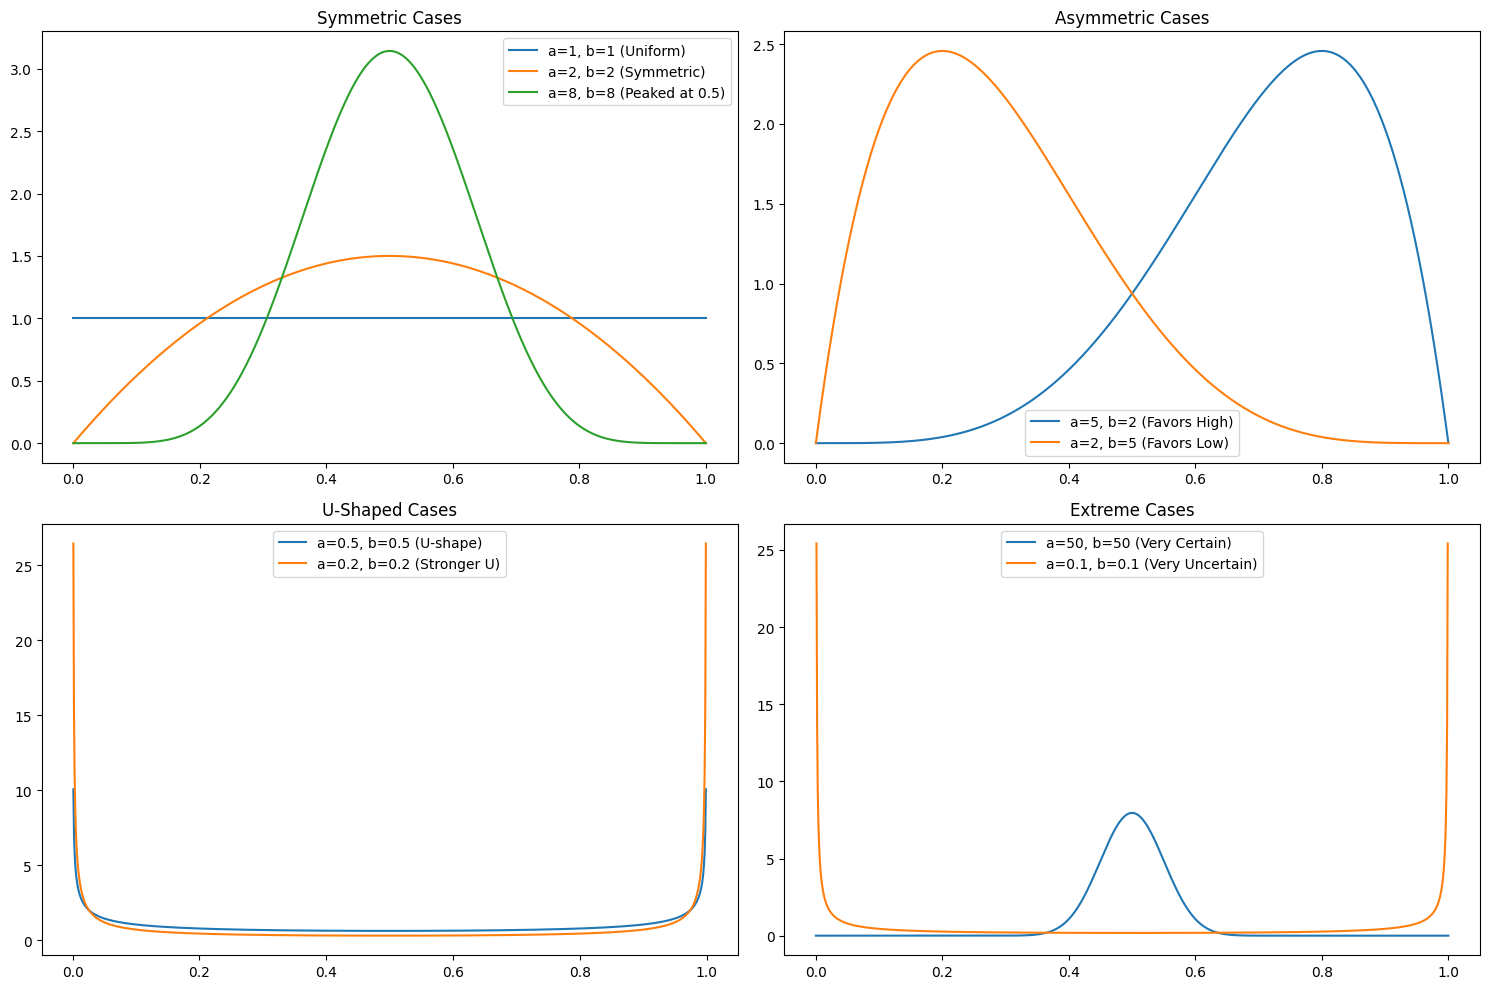

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_beta_distributions():
    theta = np.linspace(0, 1, 1000)
    
    plt.figure(figsize=(15, 10))
    
    # Plot different characteristic shapes
    plt.subplot(2, 2, 1)
    plt.plot(theta, stats.beta(1, 1).pdf(theta), label='a=1, b=1 (Uniform)')
    plt.plot(theta, stats.beta(2, 2).pdf(theta), label='a=2, b=2 (Symmetric)')
    plt.plot(theta, stats.beta(8, 8).pdf(theta), label='a=8, b=8 (Peaked at 0.5)')
    plt.title("Symmetric Cases")
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(theta, stats.beta(5, 2).pdf(theta), label='a=5, b=2 (Favors High)')
    plt.plot(theta, stats.beta(2, 5).pdf(theta), label='a=2, b=5 (Favors Low)')
    plt.title("Asymmetric Cases")
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(theta, stats.beta(0.5, 0.5).pdf(theta), label='a=0.5, b=0.5 (U-shape)')
    plt.plot(theta, stats.beta(0.2, 0.2).pdf(theta), label='a=0.2, b=0.2 (Stronger U)')
    plt.title("U-Shaped Cases")
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(theta, stats.beta(50, 50).pdf(theta), label='a=50, b=50 (Very Certain)')
    plt.plot(theta, stats.beta(0.1, 0.1).pdf(theta), label='a=0.1, b=0.1 (Very Uncertain)')
    plt.title("Extreme Cases")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_beta_distributions()